In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [79]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

In [80]:
df = pd.read_csv('../0_datasets/diamonds.csv')
df

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

In [81]:
print(df.shape)
df=df.sample(frac=0.1,random_state=10)
print(df.shape)

(53940, 10)
(5394, 10)


In [82]:
# reindex the data
df.reset_index(drop=True,inplace=True)

In [83]:
#Scatter Plot
fig=px.scatter(df,x='carat',y='price')
fig.show()

In [84]:
fig=px.line(df,x='carat',y='price')
fig.show()

In [85]:
fig=px.scatter(df,x='carat',y='price',color='cut')
fig.show()

In [86]:
fig=px.scatter(df,x='carat',y='price',color='cut',
               title='Dimaond price vs carot weight',
               labels={'carat':'carat weight','price':'Price'}
               )
fig.show()

In [87]:
# plot a line chat 
df_mean=df.groupby('carat')['price'].mean().reset_index()
fig=px.line(df_mean,x='carat',y='price',
            title='Mean price by carat'
            )
fig.show()

<Axes: xlabel='clarity', ylabel='price'>

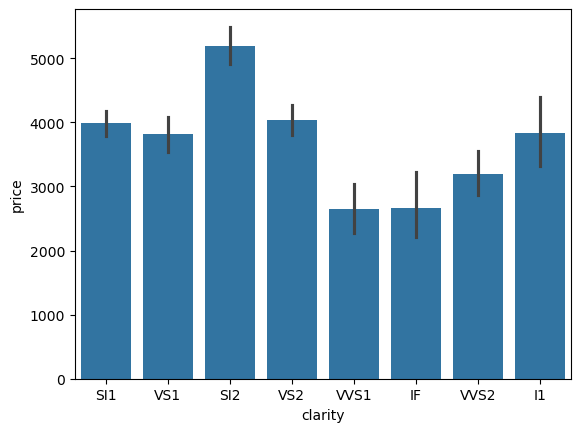

In [88]:
sns.barplot(x='clarity', y='price',data=df)


In [89]:
# bar plot for averae price per cut category
fig=px.bar(df,x='clarity',y='price', title='Averahe price by cut',color='cut')
fig.show()

In [90]:
df_stats=df.groupby('cut')['price'].agg(['mean','std']).reset_index()
df_stats.head()

cut         mean          std
0       Fair  4721.005952  3952.692720
1       Good  4011.286652  3775.099642
2      Ideal  3530.320639  3858.748131
3    Premium  4495.760194  4342.828339
4  Very Good  3987.675314  3929.767320

In [91]:
df_stats = df.groupby('cut')['price'].agg(['mean', 'std']).reset_index()

fig = px.bar(
    df_stats,
    x='cut',
    y='mean',
    title='Average Price by Cut',
    color='cut',
    error_y='std'
)

fig.show()


In [92]:
# histogram
fig=px.histogram(df,x='price',nbins=50,title='Price Distribution')
fig.show()

In [93]:
fig=px.histogram(df,x='price',nbins=50,title='Price Distribution',color='cut')
fig.show()

In [94]:
# Density countour plot
fig=px.density_contour(df,x='carat',y='price',
                       title='Density countour plot')
fig.show()

In [95]:
# box plot
fig=px.box(df,x='cut',y='price',
           title='Price Distribution by cut')
fig.show()

In [96]:
fig=px.box(df,x='cut',y='price',
           points='all',
           title='Price Distribution by cut')
fig.show()

In [97]:
fig = px.box(
    df,
    x='cut',
    y='price',
    points='suspectedoutliers',
    title='Price Distribution by Cut'
)
fig.show()


In [98]:
fig = px.box(
    df,
    x='cut',
    y='price',
    color='clarity',
    points='outliers',
    title='Price Distribution by Cut',
    labels={'price':'price ($)','cut':'cut','clarity':'clarity'}
)
fig.show()


In [99]:
fig = px.violin(
    df,
    x='cut',
    y='price',
    #color='clarity',
    points='outliers',
    title='Price Distribution by Cut',
    labels={'price':'price ($)','cut':'cut',
            #'clarity':'clarity'
            }
)
fig.show()

In [100]:
# Facet scatter plot by clarity
fig=px.scatter(df,
               x='carat',
               y='price',
               color='cut',
               facet_col='clarity',
               title='Price vs carat by cut and clarity'
               )
fig.show()

In [101]:
fig=px.scatter(df,
               x='carat',
               y='price',
               color='cut',
               facet_col='clarity',
               animation_frame='cut',
               size='price',
               title='Price vs carat by cut and clarity'
               )
fig.show()

In [102]:
# Density heatmap of carat and price
fig=px.density_heatmap(df,
                       x='carat',
                       y='price',
                       title='Density Heatmap of carot vs price')
fig.show()

subplot

In [103]:
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('Carat vs Price', 
                                    'Density Heatmap of Carat vs Price'))

# Scatter plot of carat vs price
scatter = px.scatter(df, x='carat', y='price').data[0]
fig.add_trace(scatter, row=1, col=1)

# Density heatmap of carat vs price
heatmap = px.density_heatmap(df, x='carat', y='price').data[0]
fig.add_trace(heatmap, row=1, col=2)

# Update layout
fig.update_layout(title_text='Carat vs Price and Density Heatmap of Carat vs Price')
fig.show()

In [104]:
# Create heatmap of corlation matrix of any numerical columns
corr = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()
corr

carat     depth     table     price         x         y         z
carat  1.000000  0.025077  0.167961  0.921045  0.977872  0.977024  0.847328
depth  0.025077  1.000000 -0.290898 -0.008800 -0.025174 -0.028279  0.086228
table  0.167961 -0.290898  1.000000  0.116569  0.180099  0.173648  0.113192
price  0.921045 -0.008800  0.116569  1.000000  0.887243  0.889251  0.765929
x      0.977872 -0.025174  0.180099  0.887243  1.000000  0.998270  0.861521
y      0.977024 -0.028279  0.173648  0.889251  0.998270  1.000000  0.861205
z      0.847328  0.086228  0.113192  0.765929  0.861521  0.861205  1.000000

In [105]:
corr = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()
fig=px.density_heatmap(corr,
                       text_auto=True,
                       title='Correlation Matrix')
fig.show()

In [106]:
# 3D scatter plot
fig=px.scatter_3d(df,
                  x='carat',
                  y='depth',
                  z='price',
                  color='cut',
                  title='3d Scatter plot of carat ,depth,and price')
fig.show()

In [107]:
fig=px.line_3d(df,
                  x='carat',
                  y='depth',
                  z='price',
                  color='cut',
                  title='3d Scatter plot of carat ,depth,and price')
fig.show()

In [108]:
fig=px.scatter_3d(df,
                  x='carat',
                  y='depth',
                  z='cut',
                  color='price',
                  title='3d Scatter plot of carat ,depth,and price')
fig.show()

In [109]:
fig=px.scatter(df,
               x='carat',
               y='price',
               size='price',
               color='cut',
               title='Bubble Chart:cart vs price with depth' 
               )
fig.show()

In [110]:
#Area chart of cumulative price over carat
df_sorted=df.sort_values(by='carat')
fig=px.area(df_sorted,
            x='carat',
            y='price',
            title='cumulative price by carat')
fig.show()

In [111]:
df_sorted=df.sort_values(by='carat')
fig=px.area(df_sorted,
            x='carat',
            y='price',
            color='cut',
            title='cumulative price by carat')
fig.show()

In [112]:
# pie
fig=px.pie(df,names='clarity',
           color_discrete_sequence=px.colors.sequential.RdBu,
           title='Diamond cut Distribution')
fig.show()

In [113]:
# Treemap
fig=px.treemap(df,
               path=['cut','clarity'],
               values='price',
               title='Diamond price by cut and clarity'
               
               )
fig.show()

In [114]:
# Parallel corrdinates plot
fig=px.parallel_coordinates(df,
                            color='price',
                            title='parallel coordinates plot'

)
fig.show()

In [115]:
#scatter matrix for carat depth table and price
fig=px.scatter_matrix(df, 
                      dimensions=['carat','depth','table','price'],
                      color='cut',
                      title='Scatter Matrix'

                      )
fig.show()

In [116]:
# Gantt chart of a random time series data from 2020-01-01 to 2020-01-10
df_gantt = pd.DataFrame({
    'Task': ['Groceries', 'Shopping', 'School', 'Travel', 'Lahore Shadi'],
    'Start': pd.to_datetime(['2024-01-01', '2024-01-03', '2024-01-02', '2024-01-05', '2024-01-06']),
    'Finish': pd.to_datetime(['2024-01-03', '2024-01-06', '2024-01-05', '2024-01-08', '2024-01-10'])
})
print(df_gantt.head())
fig = px.timeline(df_gantt, 
                  x_start='Start', 
                  x_end='Finish', 
                  y='Task', 
                  title='Gantt Chart of Tasks')
fig.show()

           Task      Start     Finish
0     Groceries 2024-01-01 2024-01-03
1      Shopping 2024-01-03 2024-01-06
2        School 2024-01-02 2024-01-05
3        Travel 2024-01-05 2024-01-08
4  Lahore Shadi 2024-01-06 2024-01-10


In [117]:

# strip plot
fig = px.strip(df, x='cut', y='price', 
               title='Strip Plot of Price by Cut')
fig.show()

In [118]:
# strip plot
fig = px.strip(df, x='cut', y='price', 
               title='Strip Plot of Price by Cut')
fig.update_traces(jitter=0.5, marker=dict(size=5))
fig.show()

In [119]:
# strip plot
fig = px.strip(df, x='cut', y='price', 
               color='clarity',
               hover_data=['carat'],
               title='Strip Plot of Price by Cut')
fig.update_layout(title_font_size=20, 
                  xaxis_title='Carat Size', 
                  yaxis_title='Diamond Price')
fig.show()

In [120]:

# sunburst chart

fig = px.sunburst(df, 
                path=['cut', 'clarity', 'color'],
                values='price',
                title='Sunburst Chart of Diamond Price by Cut, Clarity, and Color')
fig.show()